First 5 rows:
   school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
2  GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
3  GP;"F";15;"U";"GT3";"T";4;2;"health";"services...             

/tmp/ipython-input-1196184516.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


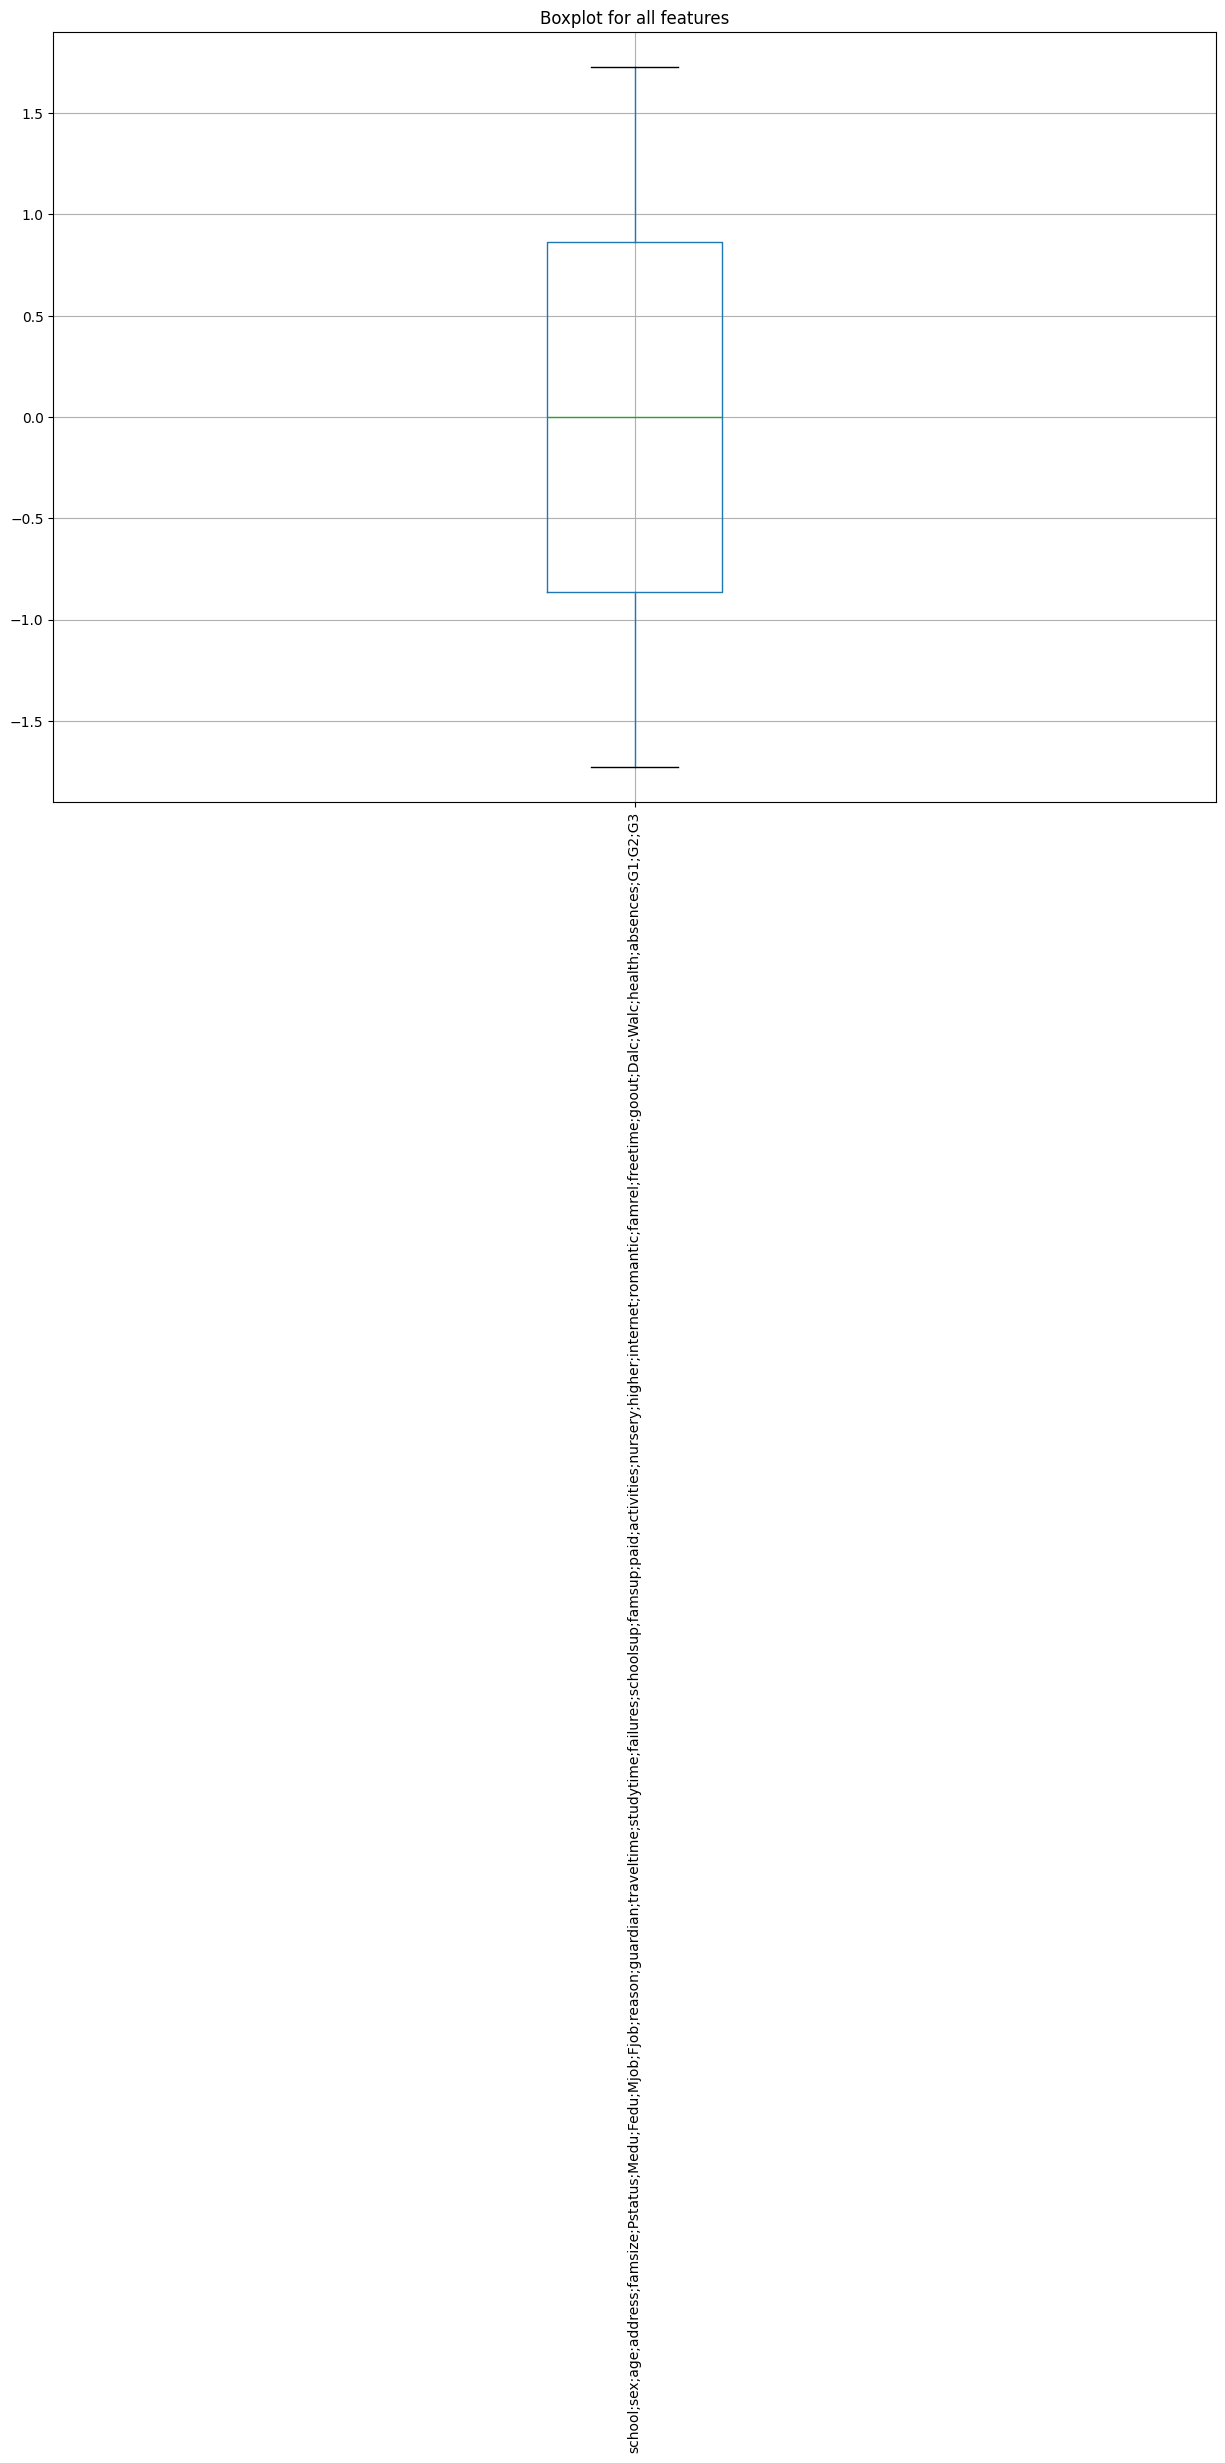


Original dataset shape: (395, 1)
Cleaned dataset shape: (395, 1)


In [5]:
# task_1.ipynb
# Data Cleaning & Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Load the dataset
url = "student-mat.csv"
df = pd.read_csv(url)

# Step 2: Explore the dataset
print("First 5 rows:\n", df.head())
print("\nData Info:\n", df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

# Step 3: Handle missing values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Step 4: Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 5: Standardize numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Step 6: Visualize outliers
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title("Boxplot for all features")
plt.xticks(rotation=90)
plt.show()

# Step 7: Remove extreme outliers using IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"\nOriginal dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New section

In [4]:
import os

# Make sure 'output' directory exists
os.makedirs('output', exist_ok=True)

# Step 8: Save cleaned dataset
df_clean.to_csv('output/student-mat-cleaned.csv', index=False)
print("Cleaned dataset saved as 'output/student-mat-cleaned.csv'")


Cleaned dataset saved as 'output/student-mat-cleaned.csv'
